# Load necessary modules

In [1]:
import pandas as pd
import seaborn as sns

# Load Datasets

In [2]:
raw_df = pd.read_csv('Product_Exclusive_Classification.csv')

## Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:
1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) 
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
  misal untuk A: “Semua tipe data sudah sesuai”

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


terdapat 8000 baris data, dengan jumlah attribut 9. Dari 9 attribut, dideteksi ada 6 attribut yang memiliki nilai kosong dengan total maksimal data hilang sebesar 2% dari keseluruhan data.

In [4]:
cats = ['brand', 'category', 'rating', 'exclusive']
nums = ['number_of_reviews', 'love', 'price', 'value_price']

In [5]:
raw_df[nums].describe()

,rating,number_of_reviews,love,price,value_price
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000


In [6]:
raw_df[cats].describe()

,exclusive
count,8000.000000
mean,0.255875
std,0.436379
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
raw_df['id'].nunique()

7951

In [7]:
raw_df['exclusive'] = raw_df['exclusive'].astype(str)
raw_df['rating'] = raw_df['rating'].astype(str)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             8000 non-null   object 
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 562.6+ KB


In [9]:
cats = ['brand', 'category', 'exclusive', 'rating']

raw_df[cats].describe()

,brand,category,exclusive,rating
count,8000,7987,8000,8000
unique,310,142,2,11
top,SEPHORA COLLECTION,Perfume,0,4.5
freq,492,619,5953,3127


0.744125

## Solutions Descriptive Statistics

Terdapat 8 attribut bernilai numeric. Attribut Id memiliki kardinalitas tinggi sehingga di data processing, attribut ini akan di hapus. Untuk data rating, diperkirakan datanya memiliki distribusi normal karena nilai mean dan mediannya itu hampir sama, sedangkan atribut2 lainnya, itu tidak memiliki distribusi normal karena nilai mean > median atau sebaliknya.

Untuk data2 kategorikal, terdapat 3 attribut. Untuk atribut exclusive, jumlah class nya tidak berimbang sehingga perlu untuk di sesuaikan ketika proses training.

## Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

<Axes: xlabel='love'>

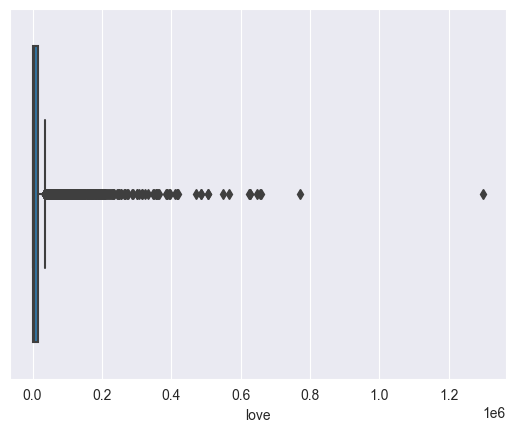

In [11]:
sns.boxplot(data=raw_df, x='love')

<Axes: xlabel='number_of_reviews'>

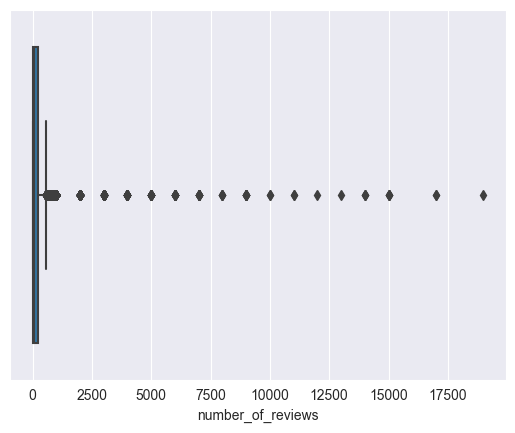

In [12]:
sns.boxplot(data=raw_df, x='number_of_reviews')

<Axes: xlabel='number_of_reviews', ylabel='Count'>

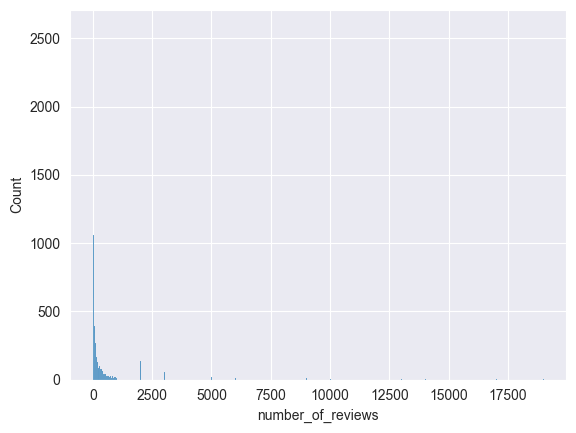

In [13]:
sns.histplot(data=raw_df, x='number_of_reviews')

<Axes: xlabel='love'>

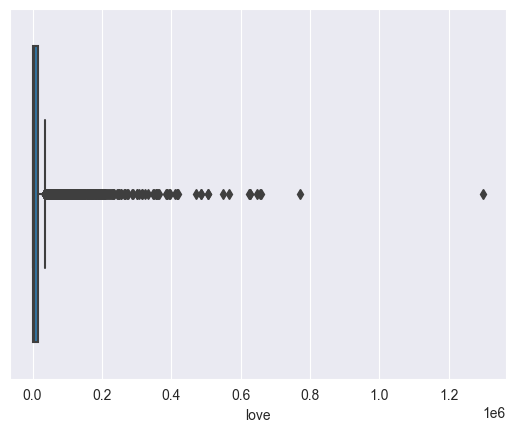

In [17]:
sns.boxplot(data=raw_df, x='love')

<Axes: xlabel='price', ylabel='Count'>

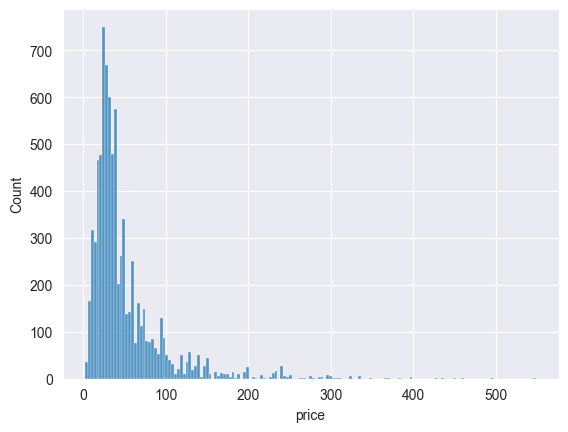

In [20]:
sns.histplot(data=raw_df, x='price')

<Axes: xlabel='rating', ylabel='count'>

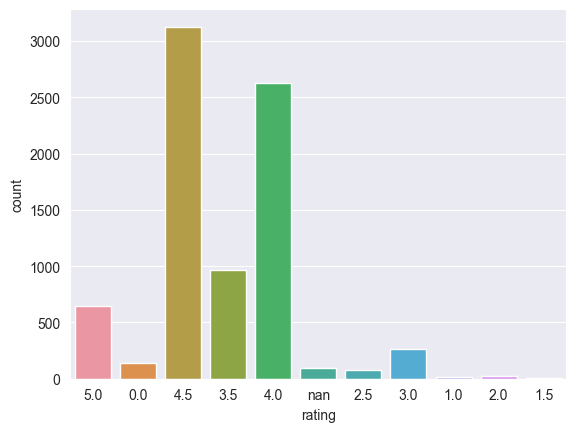

In [15]:
sns.countplot(data=raw_df, x='rating')

<Axes: xlabel='exclusive', ylabel='count'>

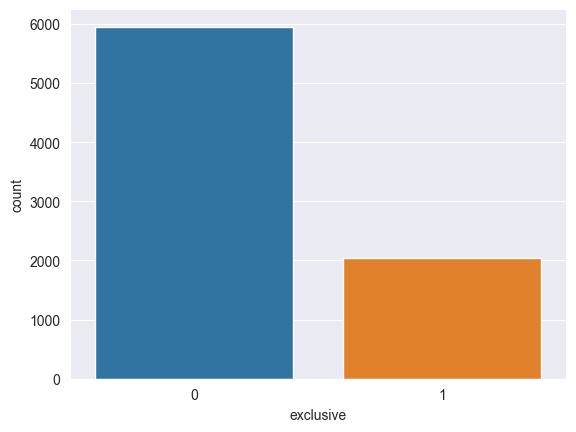

In [16]:
sns.countplot(data=raw_df, x='exclusive')

<Axes: xlabel='count', ylabel='category'>

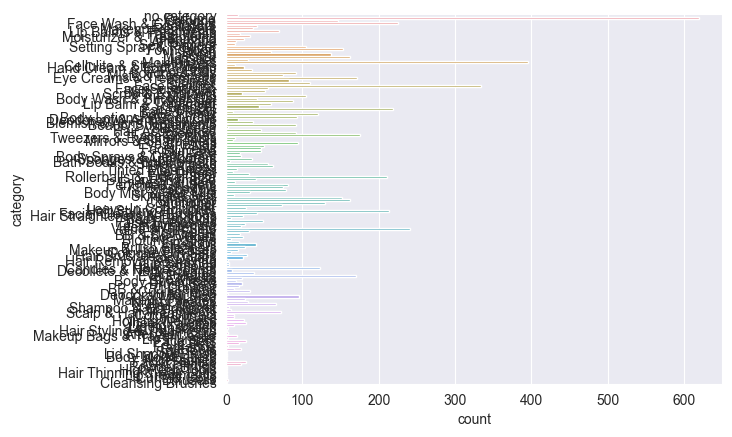

In [19]:
sns.countplot(data=raw_df, y='category')

## Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi


# Data Cleaning

In [32]:
df = raw_df.dropna()
df = df.drop_duplicates()
df = df.drop(['id'], axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              7921 non-null   object 
 1   category           7921 non-null   object 
 2   rating             7921 non-null   object 
 3   number_of_reviews  7921 non-null   float64
 4   love               7921 non-null   float64
 5   price              7921 non-null   float64
 6   value_price        7921 non-null   float64
 7   exclusive          7921 non-null   object 
dtypes: float64(4), object(4)
memory usage: 556.9+ KB


In [23]:
raw_df['exclusive'] = raw_df['exclusive'].astype(int)
raw_df['rating'] = raw_df['rating'].astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              7921 non-null   object 
 1   category           7921 non-null   object 
 2   rating             7828 non-null   float64
 3   number_of_reviews  7921 non-null   float64
 4   love               7921 non-null   float64
 5   price              7921 non-null   float64
 6   value_price        7921 non-null   float64
 7   exclusive          7921 non-null   int32  
dtypes: float64(5), int32(1), object(2)
memory usage: 526.0+ KB


C:\Users\muhammad.fahmi\AppData\Local\Temp\ipykernel_27852\2099083336.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

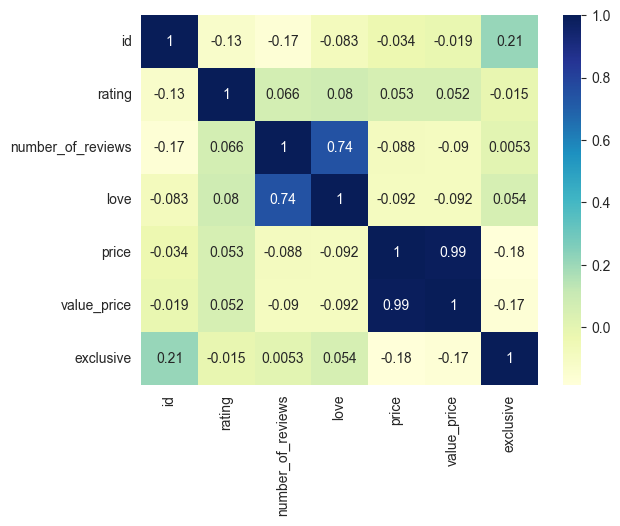

In [24]:
sns.heatmap(raw_df.corr(), cmap="YlGnBu", annot=True) 

C:\Users\muhammad.fahmi\AppData\Local\Temp\ipykernel_27852\2152269461.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(method='spearman'), cmap="YlGnBu", annot=True)


<Axes: >

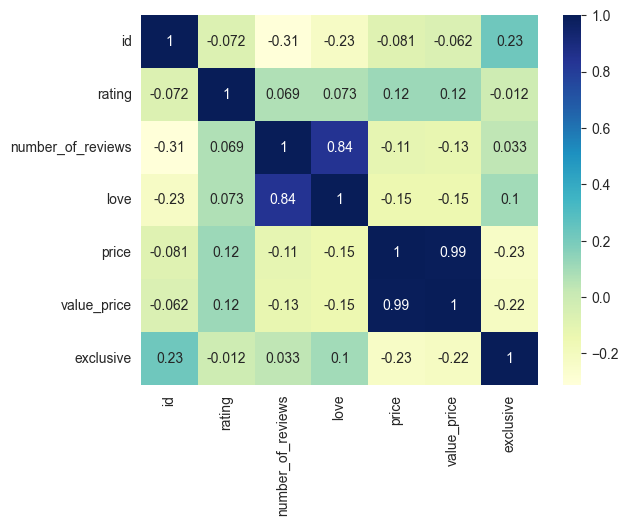

In [25]:
sns.heatmap(raw_df.corr(method='spearman'), cmap="YlGnBu", annot=True) 

C:\Users\muhammad.fahmi\AppData\Local\Temp\ipykernel_39216\1915050308.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'), cmap="YlGnBu", annot=True)


<Axes: >

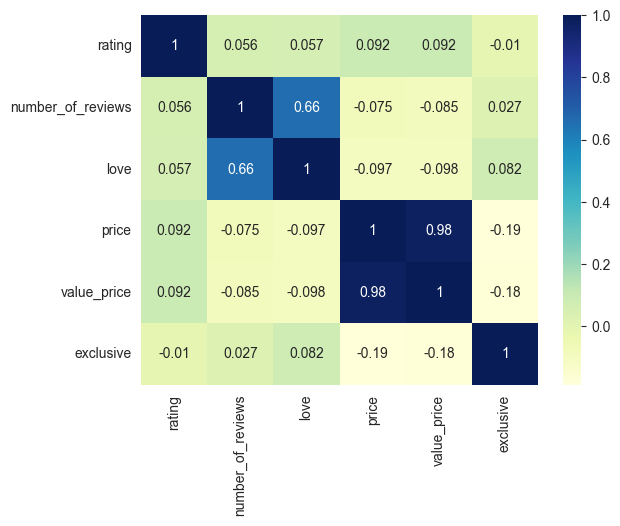

In [38]:
sns.heatmap(df.corr(method='kendall'), cmap="YlGnBu", annot=True) 

# Data Cleansing

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:
Handle missing values
Handle duplicated data
Handle outliers
Feature transformation
Feature encoding 
Handle class imbalance 
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.

* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”).

In [26]:
df = raw_df.dropna()
df = df.drop_duplicates()
df = df.drop(['id'], axis=1)

In [27]:
def outlier_handler(df, col):

    """
    Utility function to clean outlier using Tukey Fences Method.
    :param df: Dataframe with outlier (pd.DataFrame)
    :param col: Numerical Feature (String)
    :return: Dataframe without outlier (pd.DataFrame)
    """

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    outlier = df[col][(df[col] < low_bound) | (df[col] > up_bound)]

    print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%')

    no_outlier = df[(df[col] >= low_bound) & (df[col] <= up_bound)]

    return no_outlier

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              7921 non-null   object 
 1   category           7921 non-null   object 
 2   rating             7828 non-null   float64
 3   number_of_reviews  7921 non-null   float64
 4   love               7921 non-null   float64
 5   price              7921 non-null   float64
 6   value_price        7921 non-null   float64
 7   exclusive          7921 non-null   int32  
dtypes: float64(5), int32(1), object(2)
memory usage: 526.0+ KB


In [28]:
df_clean = df.drop(['brand','category', 'number_of_reviews','value_price'], axis=1)

In [29]:
df_clean = outlier_handler(df_clean, 'price')

Percentage of outliers: 8.19%


In [30]:
df_clean = outlier_handler(df_clean, 'love')

Percentage of outliers: 11.23%


<Axes: xlabel='price', ylabel='Count'>

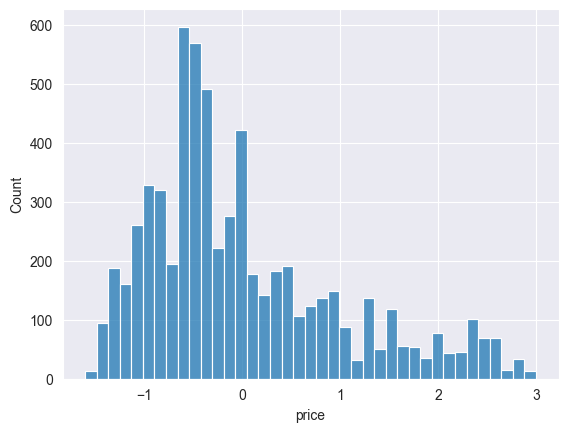

In [48]:
sns.histplot(data=df_clean, x='price')

<Axes: xlabel='love', ylabel='Count'>

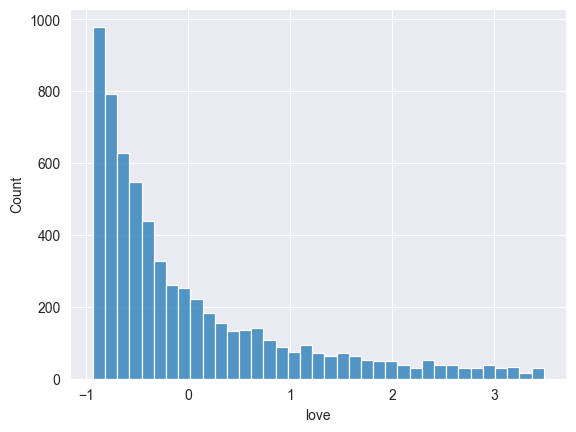

In [49]:
sns.histplot(data=df_clean, x='love')

<Axes: xlabel='price'>

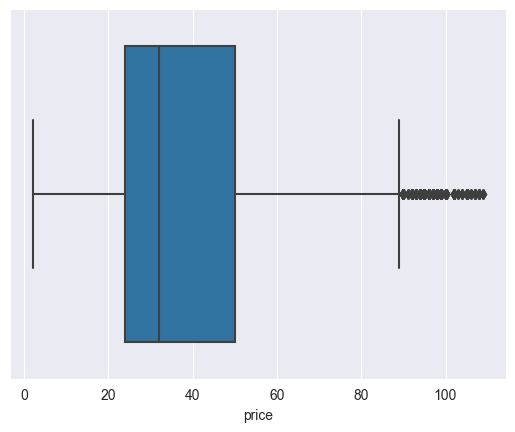

In [33]:
sns.boxplot(data=df_clean, x='price')

<Axes: xlabel='price'>

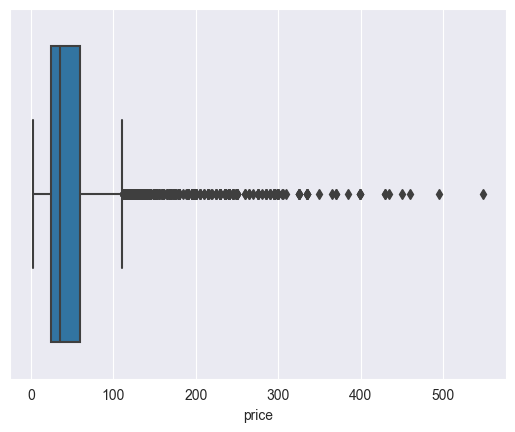

In [34]:
sns.boxplot(data=raw_df, x='price')

<Axes: xlabel='love'>

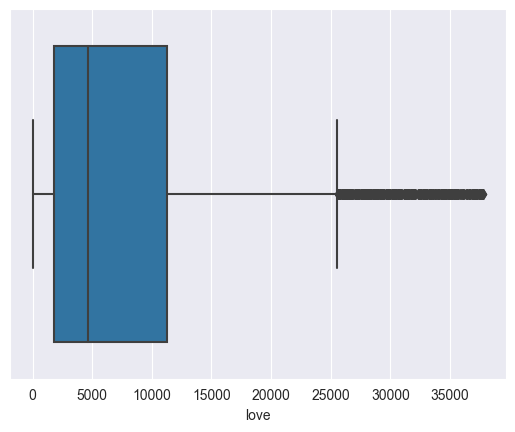

In [35]:
sns.boxplot(data=df_clean, x='love')

<Axes: xlabel='price', ylabel='Count'>

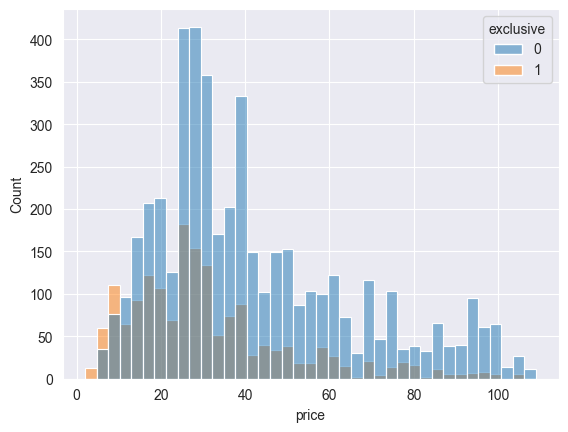

In [36]:
sns.histplot(data=df_clean, x='price', hue='exclusive')

<Axes: xlabel='love', ylabel='Count'>

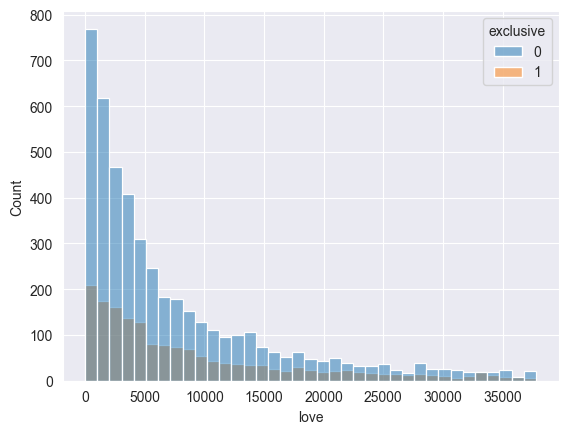

In [37]:
sns.histplot(data=df_clean, x='love', hue='exclusive')

<Axes: xlabel='exclusive', ylabel='count'>

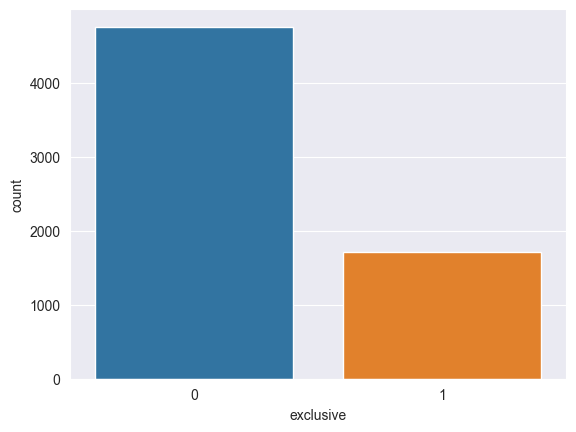

In [52]:
sns.countplot(data=df_clean, x='exclusive')

In [38]:
from sklearn.preprocessing import StandardScaler

In [47]:
price_scaler = StandardScaler()
df_clean['price'] = price_scaler.fit_transform(pd.DataFrame(df_clean['price']))

love_scaler = StandardScaler()
df_clean['love'] = love_scaler.fit_transform(pd.DataFrame(df_clean['love']))

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
le.fit_transform(raw_df['category'])

array([141, 141, 141, ...,  99, 111, 119])

In [51]:
from imblearn.over_sampling import SMOTE

In [57]:
df_clean = df_clean.dropna()

In [52]:
X = df_clean.drop('exclusive', axis=1)
y = df_clean.exclusive

smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X, y)

In [53]:
y_resample.value_counts()

0    4672
1    4672
Name: exclusive, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [64]:
X_new_train, y_new_train = smote.fit_resample(X_train, y_train)

In [65]:
X_train

,rating,love,price
3845,4.0,3000.0,49.0
4623,4.0,782.0,60.0
6596,5.0,410.0,29.0
6520,4.5,32700.0,6.8
3543,4.5,7300.0,29.0
...,...,...,...
4983,4.5,20900.0,39.0
6639,4.5,4500.0,24.0
6678,2.0,349.0,12.0
6864,4.5,13000.0,34.0


In [66]:
y_train

3845    0
4623    1
6596    0
6520    0
3543    0
       ..
4983    0
6639    1
6678    1
6864    1
1190    0
Name: exclusive, Length: 5117, dtype: int32

In [67]:
raw_df['category'].value_counts()

Perfume                  619
Moisturizers             395
Face Serums              334
Value & Gift Sets        241
Face Wash & Cleansers    225
                        ... 
Powder Brush               1
Accessories                1
Lid Shadow Brush           1
Spa Tools                  1
Cleansing Brushes          1
Name: category, Length: 142, dtype: int64

- Price Range (Categorical)
- Reviews average (numeric/Category)
- 